## Polynomial Regression

-> Creating dataset using random

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
X = np.random.uniform(-5, 5, 100).reshape(-1, 1)
y = 3*X**2 + 2*X + 5 + np.random.randn(100, 1) * 5  # quadratic with noise

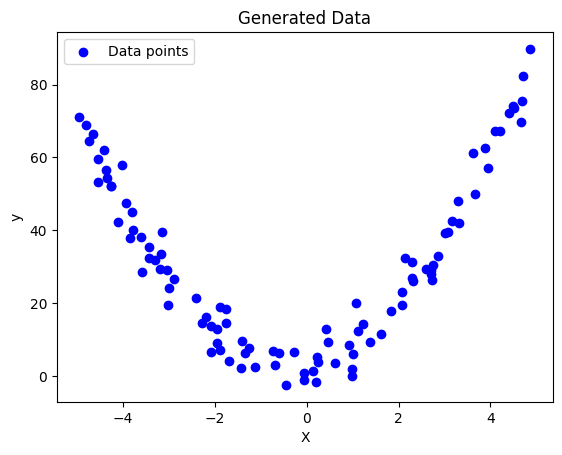

In [5]:
plt.scatter(X, y, color='blue', label='Data points')
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)


In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)


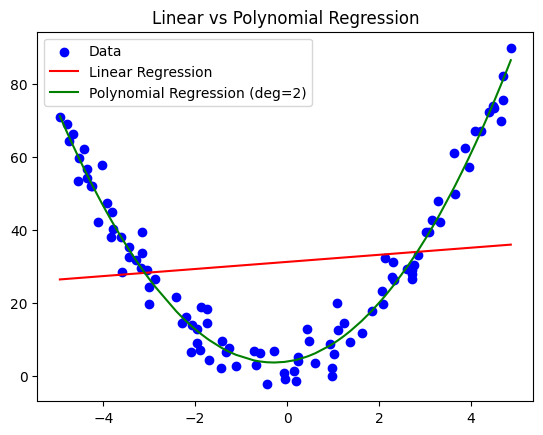

In [4]:
# Sort values for smooth curve
X_sorted = np.sort(X, axis=0)
y_lin_sorted = lin_reg.predict(X_sorted)
y_poly_sorted = poly_reg.predict(poly.transform(X_sorted))

plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_sorted, y_lin_sorted, color="red", label="Linear Regression")
plt.plot(X_sorted, y_poly_sorted, color="green", label="Polynomial Regression (deg=2)")
plt.legend()
plt.title("Linear vs Polynomial Regression")
plt.show()


In [7]:
# Common evaluation metrics for regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression metrics
mae_lin = mean_absolute_error(y, y_lin_pred)
mse_lin = mean_squared_error(y, y_lin_pred)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y, y_lin_pred)

print("Linear Regression Evaluation:")
print(f"MAE: {mae_lin:.2f}")
print(f"MSE: {mse_lin:.2f}")
print(f"RMSE: {rmse_lin:.2f}")
print(f"R2: {r2_lin:.4f}")

# Polynomial Regression metrics
mae_poly = mean_absolute_error(y, y_poly_pred)
mse_poly = mean_squared_error(y, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y, y_poly_pred)

print("\nPolynomial Regression Evaluation:")
print(f"MAE: {mae_poly:.2f}")
print(f"MSE: {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R2: {r2_poly:.4f}")

Linear Regression Evaluation:
MAE: 20.00
MSE: 547.75
RMSE: 23.40
R2: 0.0149

Polynomial Regression Evaluation:
MAE: 3.39
MSE: 19.43
RMSE: 4.41
R2: 0.9651
